# Setup

In [1]:
"""
Add parent directory to current path
"""
import os.path
import sys
p = os.path.abspath('..')
if p not in sys.path:
    sys.path.insert(0,p)
    
"""
Add tiger-env directory to current path
Still not sure why this is needed.
"""
p = os.path.abspath('../../custom_envs/gym-tiger')
if p not in sys.path:
    sys.path.insert(0, p)
    

"""
Enable hot-reloading
"""    
from notebook_utils import import_module_by_name, reload_module_by_name

def reload():
    reload_module_by_name('rlpomdp.models.qlearner', 'QLearner')
    reload_module_by_name('rlpomdp.feature_transformers.simple', 'TigerFeatureTransformer')
    global QLearner, TigerFeatureTransformer
    from rlpomdp.models.qlearner import QLearner

# Setup ENV and Model

In [28]:
import gym
import gym_tiger
import matplotlib.pyplot as plt
from rlpomdp.utils import play_one, plot_running_avg
from rlpomdp.models.qlearner import QLearner

env = gym.make('Tiger-v0')
env.__init__(reward_tiger=-100, reward_gold=10, reward_listen=-1)
model = QLearner(env, alpha=.01, gamma=1)
eps = 1
n = 0
ot = env.reset()

if 'monitor' in sys.argv:
    filename = os.path.basename(__file__).split('.')[0]
    monitor_dir = './' + filename + '_' + str(datetime.now())
    env = wrappers.Monitor(env, monitor_dir)

# Take one action and update Q

In [29]:
def print_model(model, n=''):
    print('\n')
    print('{: >10} \tOPEN LEFT | OPEN RIGHT | LISTEN'.format(n))
    print('\t\t--------- | ---------- | ------')
    print("GROWL LEFT {: >14} | {: >10} | {: >6}".format(*model.Q[0].round(2)))
    print("GROWL RIGHT: {: >12} | {: >10} | {: >6}".format(*model.Q[1].round(2)))
    print("SILENCE: {: >16} | {: >10} | {: >6}".format(*model.Q[2].round(2)))
    print('\n')

print_model(model)
otm1 = ot
atm1 = model.sample_action(otm1, eps)
ot, r, done, info = env.step(atm1)
at = model.best_action(ot)
model.update(otm1, atm1, r, ot, at)
_otm1 = env.translate_obs(otm1)
_atm1 = env.translate_action(atm1)
print(_otm1, ',', _atm1, ',', r)
print_model(model)



           	OPEN LEFT | OPEN RIGHT | LISTEN
		--------- | ---------- | ------
GROWL LEFT           0.22 |       0.79 |   0.03
GROWL RIGHT:         0.08 |       0.12 |  -0.61
SILENCE:             0.87 |      -0.98 |   0.53


SILENCE , LISTEN , -1


           	OPEN LEFT | OPEN RIGHT | LISTEN
		--------- | ---------- | ------
GROWL LEFT           0.22 |       0.79 |   0.03
GROWL RIGHT:         0.08 |       0.12 |  -0.61
SILENCE:             0.87 |      -0.98 |   0.51




# Play 10K Episodes



t=       0 	OPEN LEFT | OPEN RIGHT | LISTEN
		--------- | ---------- | ------
GROWL LEFT           0.22 |       0.79 |   0.03
GROWL RIGHT:         0.08 |       0.12 |  -0.61
SILENCE:             0.97 |      -0.98 |   0.51


t=    1000 	OPEN LEFT | OPEN RIGHT | LISTEN
		--------- | ---------- | ------
GROWL LEFT          -58.3 |     -52.93 | -52.47
GROWL RIGHT:        -53.1 |     -64.22 | -52.35
SILENCE:           -45.43 |     -45.85 | -45.45


t=    2000 	OPEN LEFT | OPEN RIGHT | LISTEN
		--------- | ---------- | ------
GROWL LEFT        -104.49 |     -103.6 | -103.93
GROWL RIGHT:       -104.2 |    -104.38 | -104.05
SILENCE:           -99.21 |     -98.32 | -98.28


t=    3000 	OPEN LEFT | OPEN RIGHT | LISTEN
		--------- | ---------- | ------
GROWL LEFT         -156.3 |    -154.75 | -154.61
GROWL RIGHT:      -154.67 |     -157.1 | -154.83
SILENCE:          -149.84 |     -149.6 | -149.05


t=    4000 	OPEN LEFT | OPEN RIGHT | LISTEN
		--------- | ---------- | ------
GROWL LEFT        -

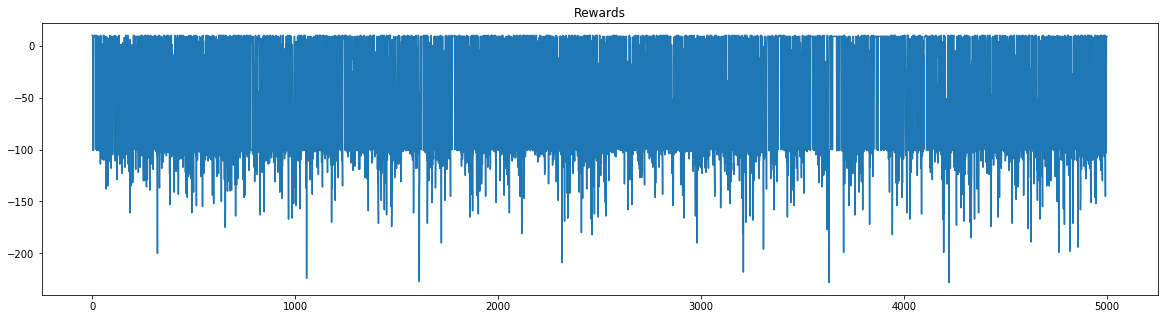

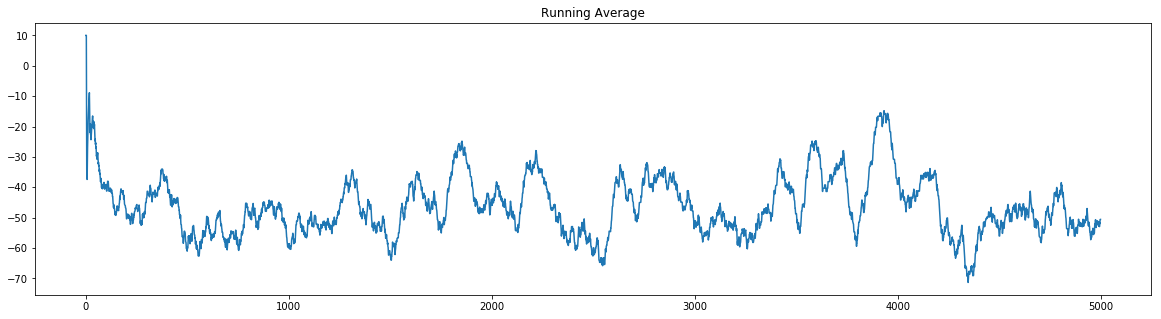

In [30]:
N = 5000
totalrewards = np.empty(N)
for n in range(N):
    eps = 1.0/np.sqrt(n+1)
    totalreward = play_one(env, model, eps)
    totalrewards[n] = totalreward
    if n % (N/5) == 0:
        print('\n\nt={: >8} \tOPEN LEFT | OPEN RIGHT | LISTEN'.format(n))
        print('\t\t--------- | ---------- | ------')
        print("GROWL LEFT {: >14} | {: >10} | {: >6}".format(*model.Q[0].round(2)))
        print("GROWL RIGHT: {: >12} | {: >10} | {: >6}".format(*model.Q[1].round(2)))
        print("SILENCE: {: >16} | {: >10} | {: >6}".format(*model.Q[2].round(2)))

print("avg reward for last 100 episodes:", totalrewards[-100:].mean())
print("total steps:", totalrewards.sum())

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot(totalrewards)
ax.set_title("Rewards")

print_model(model, n=n)
plot_running_avg(totalrewards)